# movielens电影评分数据分析(上)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 读取数据

In [3]:
# 从用户表读取用户信息
users = pd.read_table('users.dat', header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], sep='::',engine='python')

In [4]:
# 打印列表长度，共有6040条记录
print(len(users))

6040


In [5]:
# 查看前五条记录
users.head(5)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
# 同样方法，导入电影评分表
ratings = pd.read_table('ratings.dat', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], sep='::',engine='python')
# 打印列表长度
print(len(ratings))
print(ratings.head(5))
# 同样方法，导入电影数据表
movies = pd.read_table('movies.dat', header=None, names=['MovieID', 'Title', 'Genres'], sep='::',engine='python')
print(len(movies))
print(movies.head(5))

1000209
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
3883
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


## 合并数据表

In [7]:
# 导入完成之后，我们可以发现这三张表类似于数据库中的表
# 要进行数据分析，我们就要将多张表进行合并才有助于分析 先将users与ratings两张表合并再跟movied合并
data = pd.merge(pd.merge(users, ratings), movies)
data.tail(5)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,M,25,1,35401,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary


## 对数据初步描述分析

In [8]:
data.describe()

,UserID,Age,Occupation,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,2.973831e+01,8.036138e+00,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.175198e+01,6.531336e+00,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,2.500000e+01,2.000000e+00,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,2.500000e+01,7.000000e+00,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,3.500000e+01,1.400000e+01,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,5.600000e+01,2.000000e+01,3.952000e+03,5.000000e+00,1.046455e+09


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
UserID        1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Zip-code      1000209 non-null object
MovieID       1000209 non-null int64
Rating        1000209 non-null int64
Timestamp     1000209 non-null int64
Title         1000209 non-null object
Genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


## 查看数据

In [10]:
# 合并后的每一条记录反映了每个人的年龄，职业，性别，邮编，电影ID，评分，时间戳，电影信息，电影分类等一系列信息
# 比如我们查看用户id为1的所有信息
data[data.UserID==1].head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1725,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2250,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
2886,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4201,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


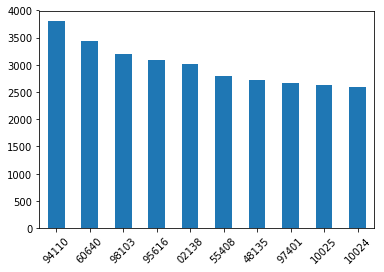

In [11]:
r = data['Zip-code'].value_counts()
r = r.sort_values(ascending=False).head(10)
r.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [12]:
# 查看评分次数多的电影并进行排序   data_rating_num接收
data_rating_num=data.groupby('Title').size()
data_rating_num.head(10)

Title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [13]:
#进行排序
data_rating_num_sorted=data_rating_num.sort_values(ascending=False)
data_rating_num_sorted = data_rating_num_sorted[(data_rating_num_sorted>300) & (data_rating_num_sorted<400)]
data_rating_num_sorted

Title
Yellow Submarine (1968)          399
Anaconda (1997)                  399
Snow Falling on Cedars (1999)    398
His Girl Friday (1940)           397
First Blood (1982)               397
                                ... 
Godzilla (Gojira) (1954)         301
Rambo III (1988)                 301
Zero Effect (1998)               301
Short Cuts (1993)                301
Old Yeller (1957)                301
Length: 256, dtype: int64

## 查看每一部电影不同性别的平均评分并计算分歧差值，之后排序

In [14]:
# 查看每一部电影不同性别的平均评分 data_gender接收
data_gender=data.pivot_table(index='Title',columns='Gender',values='Rating',aggfunc='mean')
data_gender = data_gender.loc[data_rating_num_sorted.index]
data_gender.head()

Gender,F,M
Title,,
Yellow Submarine (1968),3.714286,3.689286
Anaconda (1997),2.000000,2.248447
Snow Falling on Cedars (1999),3.482014,3.374517
His Girl Friday (1940),4.312500,4.213439
First Blood (1982),3.285714,3.599448


In [15]:
# 查看电影分歧最大的那部电影，在原数据中体现
data_gender['diff']=np.fabs(data_gender.F-data_gender.M)
data_gender.head()

Gender,F,M,diff
Title,,,
Yellow Submarine (1968),3.714286,3.689286,0.025000
Anaconda (1997),2.000000,2.248447,0.248447
Snow Falling on Cedars (1999),3.482014,3.374517,0.107497
His Girl Friday (1940),4.312500,4.213439,0.099061
First Blood (1982),3.285714,3.599448,0.313733


In [16]:
# 男女电影分歧最大进行排序 data_gender_sorted接收
data_gender_sorted=data_gender.sort_values(by='diff',ascending=False)
data_gender_sorted_top10 = data_gender_sorted.head(10)
data_gender_sorted_top10

Gender,F,M,diff
Title,,,
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Porky's (1981),2.296875,2.836364,0.539489
Fright Night (1985),2.973684,3.500000,0.526316
Anastasia (1997),3.800000,3.281609,0.518391
French Kiss (1995),3.535714,3.056962,0.478752


In [17]:
genres = movies.set_index(movies['Title']).loc[data_gender_sorted_top10.index].Genres
data_gender_sorted_top10['Genres'] = genres
data_gender_sorted_top10

c:\users\xuming\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Gender,F,M,diff,Genres
Title,,,,
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359,Comedy
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359,Action|Comedy|Romance|Thriller
"Longest Day, The (1962)",3.411765,4.031447,0.619682,Action|Drama|War
"Cable Guy, The (1996)",2.250000,2.863787,0.613787,Comedy
For a Few Dollars More (1965),3.409091,3.953795,0.544704,Western
Porky's (1981),2.296875,2.836364,0.539489,Comedy
Fright Night (1985),2.973684,3.500000,0.526316,Comedy|Horror
Anastasia (1997),3.800000,3.281609,0.518391,Animation|Children's|Musical
French Kiss (1995),3.535714,3.056962,0.478752,Comedy|Romance


## 算出每部电影平均得分并对其进行排序

In [18]:
#算出每部电影平均得分并对其进行排序 data_mean_rating 接收
data_rating_num = data_rating_num[data_rating_num>100]
mask = data['Title'].apply(lambda x: True if x in data_rating_num.index else False)
data_mean_rating = data[mask].pivot_table(index='Title', values=['Rating'])
data_mean_rating

,Rating
Title,
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
10 Things I Hate About You (1999),3.422857
101 Dalmatians (1961),3.596460
101 Dalmatians (1996),3.046703
...,...
Young Guns II (1990),2.907859
Young Sherlock Holmes (1985),3.390501
Your Friends and Neighbors (1998),3.376147


In [19]:
# 对电影平均得分排序
data_mean_rating_sorted=data_mean_rating.sort_values(by='Rating',ascending=False)
data_mean_rating_sorted.head()

,Rating
Title,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510
"Shawshank Redemption, The (1994)",4.554558
"Godfather, The (1972)",4.524966
"Close Shave, A (1995)",4.520548
"Usual Suspects, The (1995)",4.517106


## 取评分数量最多的前20条数据

In [20]:
#对评分数量进行排序，并取前20条数据
hot_movies_sorted=data_rating_num.sort_values(ascending=False)
hot_movies_sorted[:20]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

## 查看不同年龄的分布情况并且采用直方图进行可视化

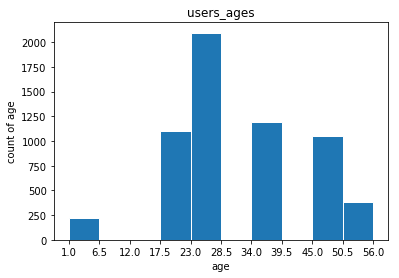

In [21]:
import matplotlib.pyplot as plt
users.Age.plot.hist(bins=10, edgecolor='white')
plt.title('users_ages')
plt.xlabel('age')
plt.ylabel('count of age')
xticks = np.linspace(np.min(users.Age), np.max(users.Age), 11)
plt.xticks(xticks)
plt.show()

## 每10岁一个区间，统计出用户的年龄分组分布

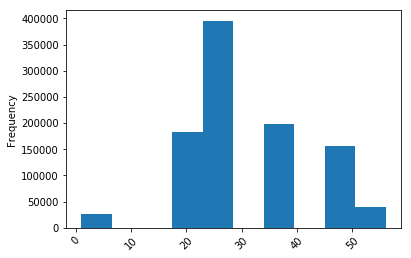

In [22]:
data['Age'].plot(kind='hist',bins=10)
plt.xticks(rotation=45)
plt.show()

## 统计数据集中每一类型的电影频数

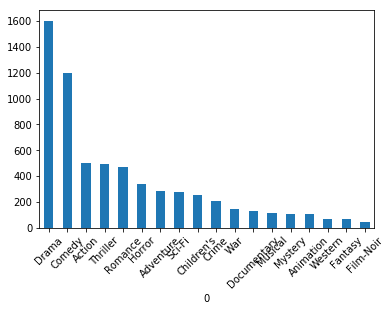

In [33]:
df = pd.DataFrame(movies.Genres.str.split('|').tolist())
df = df.stack().reset_index()
df = df.drop(['level_0', 'level_1'], axis=1)
genres = df.groupby(0).size()
genres.sort_values(ascending=False).plot(kind='bar')
# movies_ratings_sorted.
plt.xticks(rotation=45)
plt.show()